RUMUS BMI = BERAT / TINGGI^2

In [1]:
import pandas as pd #import library pandas 
import numpy as np #import library numpy
import seaborn as sns #importlibrary seaborn
import matplotlib.pyplot as plt #import library matplotlib

from warnings import simplefilter #buat filter untuk menghilangkan warning
from sklearn.exceptions import ConvergenceWarning
simplefilter ("ignore", category = "ConvergenceWarning")

In [2]:
df_bmi = pd.read_csv('bmi_train.csv') #read and load data
df_bmi

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2
...,...,...,...,...
395,Male,166,160,5
396,Male,145,130,5
397,Male,178,138,5
398,Male,168,158,5


In [3]:
df_bmi.nunique() #mencari data unik

Gender      2
Height     60
Weight    110
Index       6
dtype: int64

In [4]:
df_bmi[['Gender']].value_counts() #mengetahui value dalam sebuah kolom

Gender
Female    200
Male      200
Name: count, dtype: int64

In [5]:
print(f"Rows: {df_bmi.shape[0]}, Columns: {df_bmi.shape[1]}") #melihat jumlah kolom dan baris
print(f"Duplicates: {df_bmi.duplicated().sum()}") #melihat data duplikat
print(f"missing data: {sum(df_bmi.isna().sum())}") #melihat data missing / lost

Rows: 400, Columns: 4
Duplicates: 8
missing data: 0


In [6]:
df_bmi.drop_duplicates(keep= 'first',inplace = True) #menghapus data duplikat

In [7]:
print(f"Duplicates: {df_bmi.duplicated().sum()}") #cek kembali data duplikat

Duplicates: 0


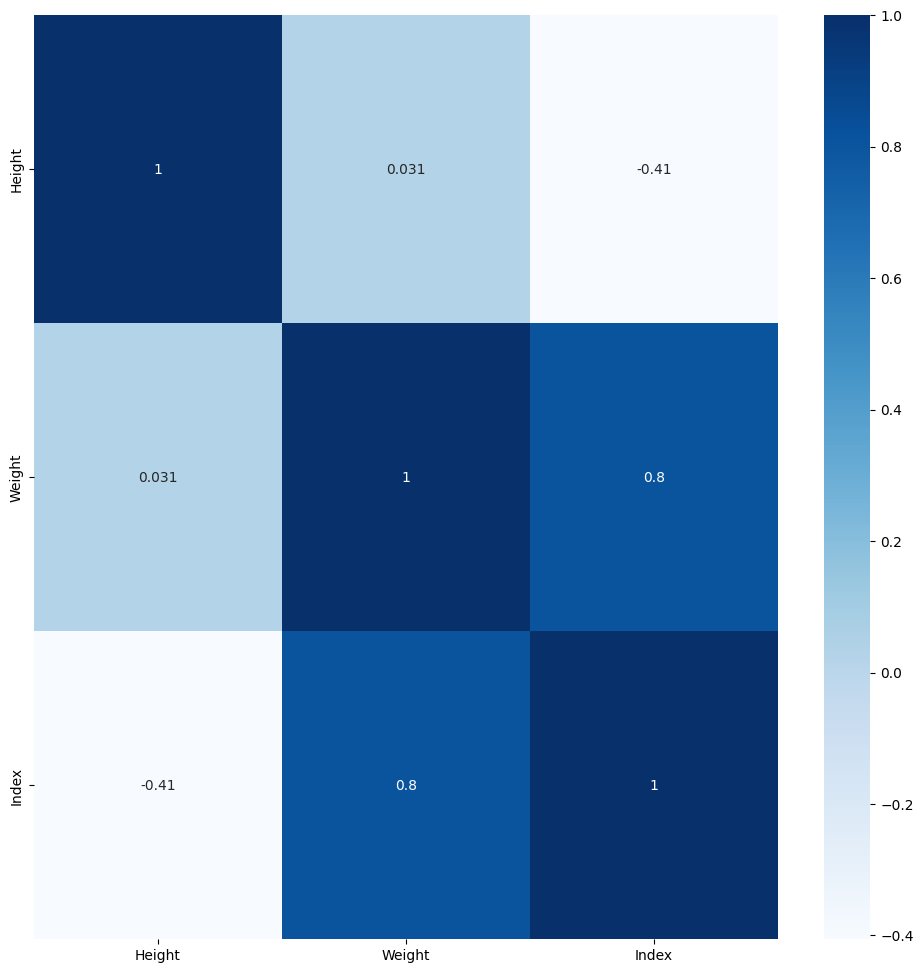

In [8]:
#melihat korelasi secara manual
correlation = df_bmi[['Height','Weight','Index']].corr()
plt.figure(figsize = (12,12))
sns.heatmap(correlation, annot = True, cmap = 'Blues' )
plt.show()

In [9]:
df_bmi2 = df_bmi #membuat kolom baru dengan rumus
df_bmi2["BMI"] = df_bmi2["Weight"]/(df_bmi2["Height"]/100)**2
df_bmi2

,Gender,Height,Weight,Index,BMI
0,Male,161,89,4,34.335095
1,Male,179,127,4,39.636715
2,Male,172,139,5,46.984857
3,Male,153,104,5,44.427357
4,Male,165,68,2,24.977043
...,...,...,...,...,...
395,Male,166,160,5,58.063580
396,Male,145,130,5,61.831153
397,Male,178,138,5,43.555107
398,Male,168,158,5,55.980726


In [10]:
df_bmi2.dtypes #melihat tipe data

Gender     object
Height      int64
Weight      int64
Index       int64
BMI       float64
dtype: object

In [11]:
# #melihat boxplota antara 2 parameter
# plt.figure(figsize=(8,7))
# sns.boxplot(x="Index", y="BMI", data=df_bmi2)
# plt.title('boxplot antara index dan bmi')
# plt.xlabel('Index')
# plt.ylabel('BMI')
# plt.show()



In [12]:
# #membuat diagram batang untuk perbandingan
# plt.figure(figsize=(15,15))
# sns.countplot(data=df_bmi2, x="Gender", hue="Index")
# plt.show()

In [13]:
#label encoder manual 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mapping = {'Male': 0, 'Female': 1}

df_bmi2['Gender'] = le.fit_transform(df_bmi2['Gender'].map(mapping))



In [14]:
df_bmi2

,Gender,Height,Weight,Index,BMI
0,0,161,89,4,34.335095
1,0,179,127,4,39.636715
2,0,172,139,5,46.984857
3,0,153,104,5,44.427357
4,0,165,68,2,24.977043
...,...,...,...,...,...
395,0,166,160,5,58.063580
396,0,145,130,5,61.831153
397,0,178,138,5,43.555107
398,0,168,158,5,55.980726


In [15]:
x=df_bmi2[['BMI']]
y=df_bmi2['Index']
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

METODE RANDOM FOREST

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 25, random_state=2)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=2)

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=7, shuffle=True)

In [18]:
scores1 = cross_val_score(model, x, y, cv=kf)
print(scores1)
print('rata rata KFold nya adalah: ',scores1.mean())

[0.94642857 0.92857143 0.94642857 0.96428571 0.98214286 0.94642857
 0.96428571]
rata rata KFold nya adalah:  0.9540816326530611


In [19]:
prediksi_model = model.predict(x_test)
prediksi_model

array([5, 4, 4, 5, 5, 3, 0, 1, 3, 5, 4, 5, 5, 3, 2, 5, 2, 4, 2, 5, 4, 2,
       3, 4, 4, 5, 4, 1, 4, 3, 4, 5, 5, 4, 5, 5, 4, 5, 2, 5, 5, 3, 3, 2,
       2, 4, 3, 4, 4, 5, 4, 5, 5, 5, 4, 5, 1, 3, 2, 5, 0, 3, 3, 5, 5, 5,
       4, 0, 1, 4, 4, 3, 5, 4, 1, 1, 5, 2, 5], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
print('Accuracy Score untuk algoritma Random Forest Adalah : ',accuracy_score(prediksi_model,y_test)*100,'%')

Accuracy Score untuk algoritma Random Forest Adalah :  94.9367088607595 %


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
accuracy = accuracy_score(y_test, prediksi_model)
classification_rep = classification_report(y_test, prediksi_model)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9493670886075949
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         6
           2       0.89      0.80      0.84        10
           3       0.92      1.00      0.96        11
           4       0.90      1.00      0.95        19
           5       1.00      0.97      0.98        29

    accuracy                           0.95        79
   macro avg       0.95      0.92      0.93        79
weighted avg       0.95      0.95      0.95        79



In [22]:
import joblib
joblib.dump(model, "Model-BMI.pkl")

['Model-BMI.pkl']